In [1]:
from symmer.symplectic import PauliwordOp, random_PauliwordOp, QuantumState, StabilizerOp
from symmer.projection import S3_projection
from symmer.utils import symplectic_cleanup
import numpy as np

In [2]:
P = random_PauliwordOp(3, 10)

List = []
for degree in range(10):
    exp_self = sum([(P**i).multiply_by_constant(1/np.math.factorial(i)) for i in range(degree+1)])
    List.append(sum(abs(exp_self.coeff_vec)))

In [3]:
from matplotlib import pyplot as plt

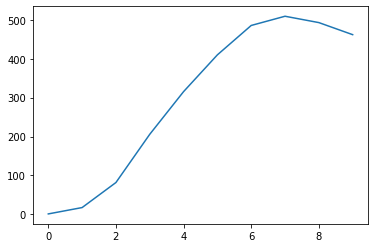

In [4]:
plt.plot(List)

In [5]:
P = random_PauliwordOp(3, 2)
Q = random_PauliwordOp(3, 1)
PQ = P*Q

print(P*Q - Q*P)
print()
print(PQ - PQ.conjugate)

1.087+0.024j YYI

0.000-4.288j YZX +
0.000+0.024j YYI


In [6]:
def exp_P(pauli, angle):
    pauli.coeff_vec[0] = 1
    return (
        (pauli**0).multiply_by_constant(np.cos(angle)) + 
        (pauli).multiply_by_constant(1j*np.sin(angle))
    )

In [94]:
def entangling_block(theta,phi):
    P1 = PauliwordOp(['IZ'], [1])
    a1 = -(1/2)*(np.pi/2-phi)
    
    P2 = PauliwordOp(['XX'], [1])
    a2 = -theta/2
    
    P3 = PauliwordOp(['YY'], [1])
    a3 = -theta/2
    
    P4 = PauliwordOp(['ZZ'], [1])
    a4 = -np.pi/4
    
    P5 = PauliwordOp(['ZI'], [1])
    a5 = -np.pi/4
    
    P6 = PauliwordOp(['IZ'], [1])
    a6 = theta/4
    
    return exp_P(P1, a1)*exp_P(P2, a2)*exp_P(P3, a3)*exp_P(P4, a4)*exp_P(P5, a5)*exp_P(P6, a6)

In [95]:
def tensor(A, B):

    A_expanded_X = np.hstack([A.X_block, np.zeros_like(A.X_block)])
    A_expanded_Z = np.hstack([A.Z_block, np.zeros_like(A.Z_block)])
    A_pad = PauliwordOp(np.hstack([A_expanded_X, A_expanded_Z]), A.coeff_vec)
    
    B_expanded_X = np.hstack([np.zeros_like(B.X_block), B.X_block])
    B_expanded_Z = np.hstack([np.zeros_like(B.Z_block), B.Z_block])
    B_pad = PauliwordOp(np.hstack([B_expanded_X, B_expanded_Z]), B.coeff_vec)
    
    return A_pad * B_pad

In [125]:
anz = tensor(A = entangling_block(3,5), B = entangling_block(1,3))
ref = QuantumState([[1,1,1,0]])

print(anz * ref)

-0.8225632308-0.1773785489j |1101> +
 0.5389488414+0.0382194732j |1110>


In [122]:
proj = S3_projection(
    StabilizerOp(
        [
            'ZIII', 
            #'ZZZZ'
        ], 
        [
            -1,
            #-1
        ]))
anz_proj = proj.perform_projection(operator=anz)
anz_proj

0.003+0.053j III +
-0.008-0.029j IIZ +
-0.011+0.028j IZI +
-0.008+0.053j IZZ +
0.487-0.048j ZII +
-0.263+0.088j ZIZ +
0.263+0.088j ZZI +
0.487+0.047j ZZZ +
-0.002+0.043j IXX +
-0.001+0.014j IXY +
0.001-0.014j IYX +
-0.002+0.043j IYY +
0.395-0.000j ZXX +
0.131-0.000j ZXY +
-0.131+0.000j ZYX +
0.395-0.000j ZYY

In [124]:
ref_proj = QuantumState([[1,0,1]])
print(anz_proj * ref_proj)

-0.5181089968+0.1532633329j |101> +
-0.7651474012+0.3501754884j |110>


In [128]:
proj.stabilizers.stabilizer_rotations

[]

In [111]:
anz = entangling_block(5,2)
print(anz)
ref = QuantumState([[0,1]])
print(anz * ref)

0.212-0.338j II +
0.144+0.300j IZ +
0.300+0.144j ZI +
0.338-0.212j ZZ +
0.084-0.084j XX +
-0.328+0.328j XY +
0.328-0.328j YX +
0.084-0.084j YY
 0.0300667749-0.2820642205j |01> +
 0.8247377443+0.4892273681j |10>


In [187]:
print(tensor(A = entangling_block(3,5), B = entangling_block(0.001,0.03)) * QuantumState([[1,0,0,1]]))

 0.1384603041-0.0272686808j |0101> +
-0.0001392160+0.0000231032j |0110> +
-0.0920916931+0.9856993879j |1001> +
 0.0001216168-0.0009824938j |1010>


In [49]:
x=1
amp=3
psi = QuantumState([[0,x], [1,x]], [1,amp]).normalize
print(psi)

 0.3162277660 |01> +
 0.9486832981 |11>


In [50]:
print(entangling_block(1,0) * psi)

 0.1469495901+0.0871692386j |01> +
-0.2288604267-0.1357580455j |10> +
 0.8159298330+0.4840025905j |11>


In [51]:
psi.conjugate * psi

0.9999999999999999

In [146]:
proj = S3_projection(StabilizerOp(['ZZ'], [1], target_sqp='X'))

In [147]:
proj.perform_projection(operator=anz)

0.550-0.550j I +
0.444+0.444j Z

In [59]:
def A(theta, phi):
    return np.array(
        [
            [1,0,0,0],
            [0,np.cos(theta), np.exp(1j*phi)*np.sin(theta),0],
            [0,np.exp(-1j*phi)*np.sin(theta), -np.cos(theta),0],
            [0,0,0,1]
        ]
    )

In [87]:
p = np.array([0,0,1,0])
D = np.outer(p,p)
D

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 0]])

In [88]:
P = np.array(
    [
        [1,0,0,0],
        [0,0,0,0],
        [0,0,1,0],
        [0,0,0,0]
    ]
)

In [89]:
print(P@A(2,1).conj().T@D@A(2,1)@P)

[[0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j]
 [0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j]
 [0.        +0.j 0.        +0.j 0.17317819+0.j 0.        +0.j]
 [0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j]]
